# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# Research questions

We are returning to the Cleary data to further illustrate how hypothesis testing can aid our interpretation os model output. Recall that these data were used to demonstrate how to test for bias in assessments using a multiple regression model.

1) Is there evidence of discrimination (i.e., intercept or slope differences) against racial groups when using High School GPA to predict future College GPAs?

# Install and load the packages

- tidyverse

- easystats

In [4]:
## Install easystats
install.packages("easystats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘bayestestR’, ‘correlation’, ‘datawizard’, ‘effectsize’, ‘insight’, ‘modelbased’, ‘parameters’, ‘performance’, ‘report’, ‘see’




In [5]:
## Load packages
library(easystats)
library(tidyverse)

# Attaching packages: easystats 0.7.4
✔ bayestestR  0.15.2   ✔ correlation 0.8.7 
✔ datawizard  1.0.2    ✔ effectsize  1.0.0 
✔ insight     1.1.0    ✔ modelbased  0.10.0
✔ performance 0.13.0   ✔ parameters  0.24.2
✔ report      0.6.1    ✔ see         0.11.0




# Load the data

These today data were simulated from the correlation matrices on Table 3 (groups 1 & 3) from Cleary (1968). These data *perfectly* reproduce the correlation matrix--within rounding error--but the individual observations are computer generated (ask me for that code if you wish).  

These data are from the original paper that the "Cleary Model" (i.e., using multiple regression with 1 continuous and 1 categorical predictor for a continuous outcome variable to detect discrimination).

The following variables are used in our dataset:

- **HSGPA**: Continuous variable specifying the High School Grade Point Average (GPA) for participants.

- **Group**: A categorical variable designating the racial identity of the hypothetical student. Levels are "Black" and "White".

- **CGPA**: A continuous variable representing the college GPA (range from 0 to 4).

Data originated from the follower paper: Cleary, T. A. (1968). Test bias: Prediction of grades of Negro and white students in integrated colleges. *Journal of Educational Measurement, 5*(2), 115-124.

Note: The paper is from the late 1960s. Consequently, the paper uses labels from that era. The methodology is still useful even if we have updated our vocabulary in modern times.

In [3]:
## Set the URL to Casey's GitHub page where the dataset is located
FileURL <- "https://raw.githubusercontent.com/CaseyGio/Psyc6290/refs/heads/main/Datasets/Cleary.csv"

## Read the csv file from GitHub and create a new object
Cleary <- read_csv(url(FileURL))

## Check out the dataset
head(Cleary, n = 10)

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Group
dbl (4): HSRank, HSGPA, SAT, CGPA

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


HSRank,HSGPA,SAT,Group,CGPA
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
72,2.09,817,White,2.59
25,1.38,818,White,0.92
81,3.15,747,Black,2.51
36,2.27,669,White,2.02
35,1.48,684,White,1.44
69,2.65,747,Black,0.88
41,1.79,656,White,2.14
43,1.83,415,Black,0.89
75,3.00,843,Black,1.91


## Hypothesis testing each estimated parameter

Recall that our main effect regression model is the following:

$$\hat{y} = \beta_0 + \beta_1 \cdot \text{HSGPA} + \beta_2 \cdot \text{Group[White]}$$

In regression, the **null hypothesis** test is, by default, assessing whether our parameter estimates are statistically different from zero.

$$H_O: \beta_i = 0$$

This applies to all 3 $\beta$ parameters (i.e., regression weights). The intercept ($\beta_0$), the slope for the HSGPA continuous variable ($\beta_1$), and the "slope" for the categorical level White for the racial group variable ($\beta_2$). So really we have 3 tests:

$$H_0: \beta_0 = 0 \\
H_0: \beta_1 = 0 \\
H_0: \beta_2 = 0$$

The **alternative hypotheses** are that the regression weights are *not* equal to zero.

$$H_a: \beta_i \neq 0$$

Like above, this applies to each parameter we have estimated (i.e., the intercept and both slopes).

$$H_a: \beta_0 \neq 0 \\
H_a: \beta_1 \neq 0 \\
H_a: \beta_2 \neq 0$$

## Estimate two regression models

We shall estimate two regression models, a main-effects and an interaction-effects model.

In [13]:
## Estimate main effects model with both IVs and CGPA as the outcome
ModMainEff <- lm(CGPA ~ HSGPA + Group, data = Cleary)

## View the parameter estimates
parameters(ModMainEff) %>%
  mutate(across(-Parameter, ~ round(.x, 5)))

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.50086,0.13254,0.95,0.23948,0.76225,3.77885,197,0.00021
HSGPA,0.49845,0.04868,0.95,0.40245,0.59445,10.23968,197,0.00000
GroupWhite,0.70122,0.07116,0.95,0.56088,0.84155,9.85373,197,0.00000


## Main-effects model hypothesis tests

Each hypothesis test uses a *t*-test statistic and the *t* distribution and the degrees of freedom (DF_error) loosely represents our sample size here. We interpret the *p*-values against a pre-specified threshold value.

For the sake of convention, $\alpha$ = .05 will be our threshold. If $p < \alpha$, then we have evidence that our parameter is statistically different from zero (which is our null hypothesis).

For philosophical and probability reasons, this is NOT evidence in favor of the alternative hypothesis but is rather evidence AGAINST the null. This is eternally confusing, it's not my choice.

**Intercept**

$0.000208 < 0.05$ so we have evidence to refute the null hypothesis that the intercept is 0. The intercept is the Black racial group category so all we can claim from this parameter is that Black students have a non-zero y-intercept value (here, 0.50).

**Slope: HSGPA**

$0.00000 < .05$ so we have evidence to refute the null hypothesis that the slope for the HSGPA variable is 0. This slope tells us that there is a non-zero (here, slope = 0.498) line-of-best-fit for HSGPA predicting college GPA. In the main effects model, we use the same slope for both groups so this tells us that HSGPA does indeed predict college GPA.

**Slope: Group[white]**

$0.00000 < .05$ so we have evidence to refute the null hypothesis that this group has a term of 0. Recall that this is the "offset" value for the intercept and therefore tells us whether White students have a significantly different y-intercept than Black students. We have evidence that White students have a higher y-intercept (0.701 + 0.501).

## Main effects visualization

In a main-effects model, the slope is the same for each subgroup. Each group, however, has a different estimated intercept term. That is why the lines look parallel (they are).

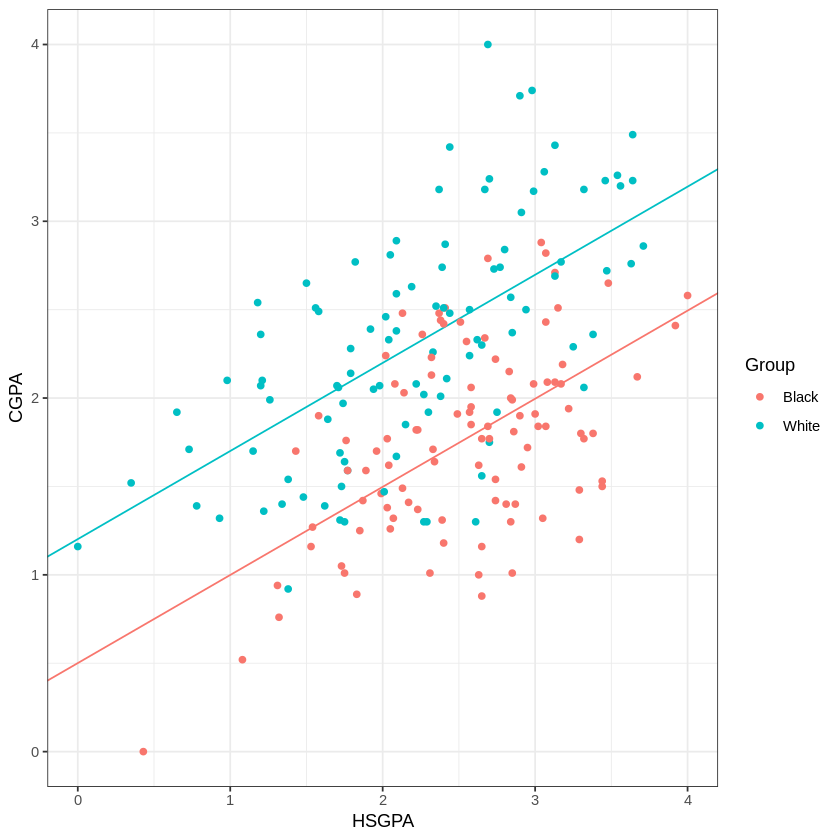

In [32]:
## Setup for the graph
Color1 <- scales::hue_pal()(2)[1] ## Black group line color
Color2 <- scales::hue_pal()(2)[2] ## White group line color
BlackIntercept <- coef(ModMainEff)[1]
Slope <- coef(ModMainEff)[2]
WhiteIntercept <- BlackIntercept + coef(ModMainEff)[3]

## Create scatterplot of HSGPA, Group, and CGPA
ggplot(data = Cleary, mapping = aes(x = HSGPA, y = CGPA, color = Group)) +
  geom_abline(aes(intercept = BlackIntercept, slope = Slope), color = Color1) +
  geom_abline(aes(intercept = WhiteIntercept, slope = Slope), color = Color2) +
  geom_point() +
  theme_bw()

In [14]:
## Estimate interaction effects model with both IVs and CGPA as the outcome
ModInteractEff <- lm(CGPA ~ HSGPA * Group, data = Cleary)

## Extract the parameters
parameters(ModInteractEff) %>%
  mutate(across(-Parameter, ~ round(.x, 5)))

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.65529,0.20575,0.95,0.24953,1.06105,3.18494,196,0.00168
HSGPA,0.43738,0.07901,0.95,0.28157,0.59320,5.53588,196,0.00000
GroupWhite,0.46398,0.25200,0.95,-0.03299,0.96094,1.84121,196,0.06710
HSGPA:GroupWhite,0.09845,0.10031,0.95,-0.09939,0.29628,0.98140,196,0.32760


# Interaction-effects model hypothesis tests

Everything about hypothesis tests is the same as in the main-effects model! The only difference is how we interpret specific terms. For instance, instead of using the same HSGPA slope for each subgroup, the interaction term is telling us the "offset" slope for the White group (compared to the baseline Black group).

Recall the general regression equation:
$$\hat{y} = \beta_0 + \beta_1 \cdot \text{HSGPA} + \beta_2 \cdot \text{Group[White]} + \beta_3 \cdot \text{HSGPA:Group[White]}$$

**Intercept**

$0.00168 < 0.05$ so we have evidene to reject the null hypothesis.

**Slope: HSGPA**

$0.00000 < .05$ so we have evidence to reject the null hypothesis.

**Slope: Group[White]**

$0.07 > 0.05$ so we CANNOT reject the null hypothesis. The offset intercept term does not appear to be statistically different from 0 (it is *technically* different from zero but with uncertainty, it is unclear that other samples would be different from zero). Essentially, we are saying both groups have the same intercept, functionally.

**Slope: $HSGPA \times Group[White]$**

$0.33 > 0.05$ so we CANNOT reject the null hypothesis. The offset slope term is not statistically different from 0. We do not have enough evidence to suggest that the Black and White groups have different slope terms.

## Interaction effects visualization

The two lines-of-best-fit are not perfectly parallel nor are they perfectly overlapping at the y-intercept. However, people are not the best judge of "are they different enough," which is why we use hypothesis testing (albeit hypothesis testing has many flaws, too).

`geom_smooth()` using formula = 'y ~ x'


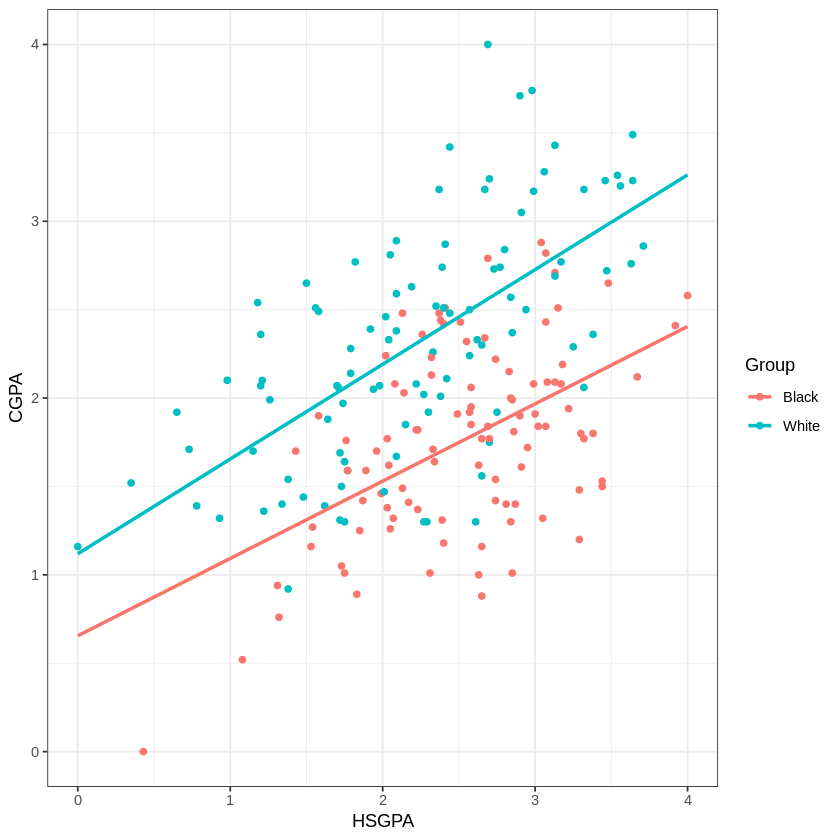

In [33]:
## Visualize interaction effect model
ggplot(data = Cleary, mapping = aes(x = HSGPA, y = CGPA, color = Group)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, fullrange = TRUE) +
  theme_bw()

# Comparing models

Remember that we often want to compare models. Does adding the interaction term statistically improve our prediction? Or is it just capitalizing on chance occurrences or flukes in the data?

We can compare two different *nested* models using the `anova()` function. You may remember the term ANOVA from pervious statistics courses, this is the same principle we are using. Essentially, it allows us to conduct a hypothesis test to see if we are improving the model fit beyond fluke changes in the data.

The test statistic is an *F*-test and it follows an *F*-distribution. We are not overly concerned with these details at the moment, merely the result.



In [21]:
## Compare nested models statistically
anova(ModMainEff, ModInteractEff)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,197,47.59169,NA,NA,NA,NA
2,196,47.35897,1,0.232723,0.9631483,0.3276048


## Interpreting model comparison

The hypothesis test is comparing the improved prediction by estimating new parameters (i.e., the interaction term) against the fact that it is more difficult to accurately estimate more parameters. This is a sort of cost-benefit analysis.

$0.33 < 0.05$

This tells us that maybe we should reject the more complex model in favor of the more simplified model.

# Parameter versus model hypothesis testing

When looking at test bias, we are concerned with parameter values. Does the Black group fare better/worse than the White group? We need to look for slope & intercept bias by examining the p-values and coeffients for the individual parameters.

Generally, for prediction and other purposes, we want to examine overall model performance, too. We can add more and more parameters to technically increase our $R^2$ value but this comes are great costs (e.g., that model will do TERRIBLY in a different dataset). These tests let us balance (a) maximizing predictability and (b) minimizing model complexity.

We need to understand the data and our research questions to best conduct hypothesis testing. Here, our RQ relates to parameter-specific values (e.g., differences in racial group prediction). That means we would want to estimate the Cleary model (interaction effects regression model) even if this model is not the best representation of reality. We aren't trying to model human behavior, we are trying to detect human error in this case!